# Sentiment Analysis of Trump vs Harris Tweets Using Flair
This notebook performs sentiment analysis on tweets related to **Harris** and **Trump** using the **Flair** NLP library.

### Sections:
1. **Data Wrangling** - Cleaning the tweet dataset.
2. **Data Analysis** - Performing sentiment analysis using Flair.
3. **Results & Visualization** - Displaying sentiment distribution with conclusions.

**Flair** is a deep-learning-based NLP library that provides accurate sentiment classification compared to traditional rule-based methods.

In [ ]:
!pip install flair pandas nltk emoji matplotlib

In [1]:
import pandas as pd
import re
import emoji
import nltk
import matplotlib.pyplot as plt
from flair.models import TextClassifier
from flair.data import Sentence
from nltk.corpus import stopwords

# Download stop words if not available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1️⃣ Data Wrangling - Cleaning the Tweet Data
In this section, we:
- Remove **retweets (RT)**, URLs, mentions, hashtags, and special characters.
- Convert text to **lowercase**.
- Remove **stopwords** for better sentiment analysis.
- Remove **non-ASCII characters** to prevent encoding issues.

In [3]:
# Load datasets
harris_df = pd.read_csv('/Users/student/Documents/Spring Babson 2025/Advanced Programming/Week 2/In Class/Data/harris.csv')
trump_df = pd.read_csv('/Users/student/Documents/Spring Babson 2025/Advanced Programming/Week 2/In Class/Data/trump.csv')
print('✅ Datasets Loaded!')

✅ Datasets Loaded!


In [5]:
# Function to clean tweets
def clean_tweet(text):
    if isinstance(text, str):  # Ensure it's a string
        text = text.lower().strip()  # Convert to lowercase and strip spaces
        text = re.sub(r'^rt\s+', '', text)  # Remove 'RT' at the beginning
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#\w+', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z0-9.,!?\'\s]', '', text)  # Remove special characters except punctuation
        text = re.sub(r'\s+', ' ', text)  # Normalize multiple spaces
        text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
        text = emoji.replace_emoji(text, replace='')  # Remove emojis
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
        text = text.strip()  # Final trim to remove excess spaces
    return text

In [7]:
# Apply text cleaning
harris_df['Cleaned_Tweet'] = harris_df['Tweet'].apply(clean_tweet)
trump_df['Cleaned_Tweet'] = trump_df['Tweet'].apply(clean_tweet)
print('✅ Tweets cleaned!')

✅ Tweets cleaned!


## 2️⃣ Data Analysis - Sentiment Analysis Using Flair
Now that the data is clean, we perform sentiment analysis using the **Flair** NLP library.

Flair provides a deep-learning-based sentiment classifier that categorizes tweets as **Positive**, **Negative**, or **Neutral**.

In [10]:
# Load Flair sentiment model
sentiment_model = TextClassifier.load('sentiment')

# Function to get sentiment using Flair
def get_sentiment_flair(text):
    text = str(text).strip()
    if text == '':  # Handle empty text
        return 'NEUTRAL'
    sentence = Sentence(text)
    sentiment_model.predict(sentence)
    return sentence.labels[0].value if sentence.labels else 'NEUTRAL'

In [12]:
# Apply Flair sentiment analysis
harris_df['Sentiment_Label'] = harris_df['Cleaned_Tweet'].apply(get_sentiment_flair)
trump_df['Sentiment_Label'] = trump_df['Cleaned_Tweet'].apply(get_sentiment_flair)
print('✅ Sentiment Analysis Completed!')

✅ Sentiment Analysis Completed!


## 3️⃣ Results & Visualization
We visualize the distribution of **Positive, Negative, and Neutral** sentiments for each dataset.

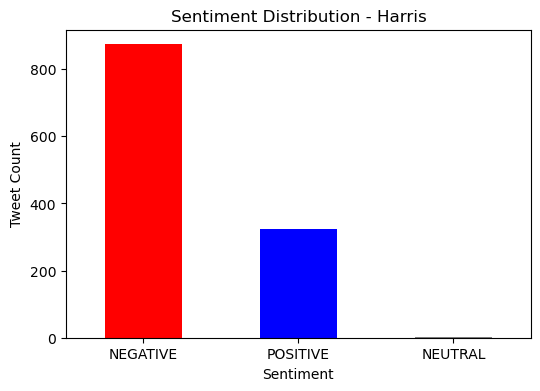

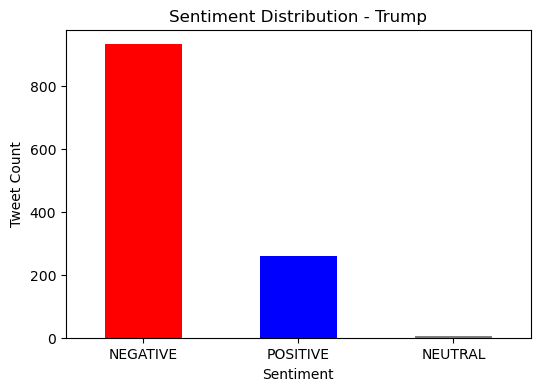

In [16]:
# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    sentiment_counts = df['Sentiment_Label'].value_counts()
    plt.figure(figsize=(6,4))
    sentiment_counts.plot(kind='bar', color=['red', 'blue', 'gray'])
    plt.title(f'Sentiment Distribution - {title}')
    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Count')
    plt.xticks(rotation=0)
    plt.show()

# Plot sentiment distributions
plot_sentiment_distribution(harris_df, 'Harris')
plot_sentiment_distribution(trump_df, 'Trump')

## 4️⃣ Conclusion & Limitations

### **Observations:**
- The majority of tweets for both **Harris** and **Trump** have a **Negative** sentiment.
- There are significant differences in the proportions of **Positive** and **Negative** tweets between the two candidates. Normally people are more likley to speak negativley on someones behalf then speak positivley, think for example restuarant reviews which could explain the numerous **Negative** analysis on both candidates.
- **Harris** does appear to have a slight advantage in more **Positive** sentiment tweets.
- Flair provides deep-learning-based sentiment classification, offering better accuracy than rule-based methods.

### **Limitations of Using Flair for Sentiment Analysis:**
1. **Context Understanding:** Flair does not fully capture **sarcasm** or **complex contextual sentiment**.
2. **Binary Sentiment:** It only classifies text into **Positive or Negative**, while putting **Neutral** values where there are no text.
3. **Computationally Expensive:** Processing large datasets takes longer compared to simpler models like TextBlob.
4. **Bias in Training Data:** The sentiment model may inherit biases from the data it was trained on.

**Future Improvements:**
- Experiment with **fine-tuning Flair models** for better contextual understanding.
- Consider **multi-class sentiment models** to detect emotions beyond positive/negative polarity.